In [1]:
import pandas as pd 
import numpy as np 
import nltk 
import re
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn import tree

from imblearn.over_sampling import SMOTE
from collections import Counter

from nltk import FreqDist, word_tokenize

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import collections, numpy

In [3]:
df= pd.read_csv('Twitter_Emotion_Dataset.csv') 

In [4]:
print("Missing dataset value in all : ",df.isnull().values.any())

Missing dataset value in all :  False


In [5]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [6]:
df.shape

(4401, 2)

In [7]:
print('Jumlah kolom pada dataset:  ', len(df.columns))
print('Jumlah baris pada dataset:  ', len(df))

Jumlah kolom pada dataset:   2
Jumlah baris pada dataset:   4401


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


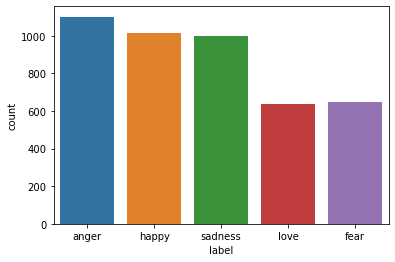

In [8]:
sns.countplot(df['label'],label="Count") #Grafik pada kolom label
plt.show() 

In [9]:
collections.Counter(df['label'])

Counter({'anger': 1101,
         'happy': 1017,
         'sadness': 997,
         'love': 637,
         'fear': 649})

In [10]:
df['tweet'][21]

'Separuh hati ini iri jika melihat seorang anak yg masih bisa duduk atau berjalan bersama ibundanya, dan separuh hati ini turut berempati melihat seorang anak yg begitu gundah saat ibundanya sakit. Yang sabar ya kawan, semoga Allah memberikan yg terbaik untuk kita semua.'

In [11]:
def case_folding(tweet):  
    tweet = tweet.lower()
    return tweet
df['tweet']= df['tweet'].apply(case_folding)  

In [12]:
df.head()

,label,tweet
0,anger,"soal jln jatibaru,polisi tdk bs gertak gubernu..."
1,anger,"sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,kepingin gudeg mbarek bu hj. amad foto dari go...
3,anger,"jln jatibaru,bagian dari wilayah tn abang.peng..."
4,happy,"sharing pengalaman aja, kemarin jam 18.00 bata..."


In [13]:
def clean_tweet(tweet):
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', ' ', tweet)
    
    # remove number
    tweet = re.sub(r'[0-9]+', '', tweet)
    
    #remove url 
    tweet = re.sub("url", "", tweet)
    
    #remove username 
    tweet = re.sub('username', '', tweet)
    
    #remove sensitiveno
    tweet = re.sub('sensitiveno', '', tweet)
    
    #remove URL 
    tweet = re.sub("https", "", tweet)
    
    # remove askfm
    tweet = re.sub('askfm', '', tweet)
    
    #remove double spasi
    tweet= " ".join(tweet.split())    
    return tweet
df['tweet']= df['tweet'].apply(clean_tweet)

In [14]:
df['tweet'][2489]

'ga pernah dipaksa sih buat berkerudung tapi dari sd udah keinginan sendiri juga tapi sayang kata mama waktu itu kelas bentar lagi lulus drpd beli baju lagi'

In [15]:
df.head()

,label,tweet
0,anger,soal jln jatibaru polisi tdk bs gertak gubernu...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...
3,anger,jln jatibaru bagian dari wilayah tn abang peng...
4,happy,sharing pengalaman aja kemarin jam batalin tik...


In [16]:
key_norm = pd.read_csv('kamus_normalisasi.csv')

def normalisasi(tweet):
    tweet = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] 
                      if (key_norm["singkat"] == word).any() else word for word in tweet.split()])
    return tweet
df['tweet']= df['tweet'].apply(normalisasi)

In [17]:
df.head()

,label,tweet
0,anger,soal jalan jatibaru polisi tidak bisa gertak g...
1,anger,sesama cewek loh sepertinya harusnya bisa lebi...
2,happy,ingin gudeg mbarek bu hj amad foto dari google...
3,anger,jalan jatibaru bagian dari wilayah tanah abang...
4,happy,sharing pengalaman saja kemarin jam batalin ti...


In [18]:
df.head()

,label,tweet
0,anger,soal jalan jatibaru polisi tidak bisa gertak g...
1,anger,sesama cewek loh sepertinya harusnya bisa lebi...
2,happy,ingin gudeg mbarek bu hj amad foto dari google...
3,anger,jalan jatibaru bagian dari wilayah tanah abang...
4,happy,sharing pengalaman saja kemarin jam batalin ti...


In [32]:
tweet = df['tweet'].values
y = df['label'].values

In [33]:
teks = ' '.join(tweet)
kata = nltk.tokenize.word_tokenize(teks)
fdist = FreqDist(kata)
top_words = fdist.most_common()
print(top_words)

[('yang', 3359), ('aku', 2599), ('tidak', 2252), ('dan', 1895), ('di', 1757), ('sudah', 1168), ('saya', 1154), ('ini', 1145), ('itu', 1062), ('kalau', 1042), ('ya', 1028), ('ada', 1012), ('sama', 995), ('saja', 950), ('tapi', 950), ('kamu', 914), ('masih', 850), ('orang', 810), ('bisa', 774), ('dia', 735), ('nya', 700), ('lagi', 682), ('mau', 681), ('jadi', 674), ('dengan', 645), ('ke', 631), ('juga', 629), ('kita', 625), ('karena', 622), ('dari', 614), ('banget', 582), ('untuk', 551), ('apa', 541), ('hanya', 527), ('cinta', 503), ('sayang', 493), ('takut', 485), ('terus', 434), ('sampai', 426), ('akan', 407), ('seperti', 399), ('tahu', 389), ('begitu', 387), ('buat', 364), ('selalu', 363), ('sih', 354), ('lebih', 345), ('banyak', 333), ('memang', 324), ('mereka', 311), ('jangan', 290), ('teman', 288), ('kan', 286), ('suka', 284), ('harus', 283), ('semua', 283), ('lain', 282), ('atau', 277), ('bahkan', 268), ('hari', 268), ('sekarang', 265), ('pernah', 263), ('dalam', 261), ('pada', 26

In [20]:
teks = ' '.join(text)

In [21]:
kata = nltk.tokenize.word_tokenize(teks)

In [22]:
fdist = FreqDist(kata)

In [23]:
top_words = fdist.most_common()
print(top_words)

[('yang', 3359), ('aku', 2599), ('tidak', 2252), ('dan', 1895), ('di', 1757), ('sudah', 1168), ('saya', 1154), ('ini', 1145), ('itu', 1062), ('kalau', 1042), ('ya', 1028), ('ada', 1012), ('sama', 995), ('saja', 950), ('tapi', 950), ('kamu', 914), ('masih', 850), ('orang', 810), ('bisa', 774), ('dia', 735), ('nya', 700), ('lagi', 682), ('mau', 681), ('jadi', 674), ('dengan', 645), ('ke', 631), ('juga', 629), ('kita', 625), ('karena', 622), ('dari', 614), ('banget', 582), ('untuk', 551), ('apa', 541), ('hanya', 527), ('cinta', 503), ('sayang', 493), ('takut', 485), ('terus', 434), ('sampai', 426), ('akan', 407), ('seperti', 399), ('tahu', 389), ('begitu', 387), ('buat', 364), ('selalu', 363), ('sih', 354), ('lebih', 345), ('banyak', 333), ('memang', 324), ('mereka', 311), ('jangan', 290), ('teman', 288), ('kan', 286), ('suka', 284), ('harus', 283), ('semua', 283), ('lain', 282), ('atau', 277), ('bahkan', 268), ('hari', 268), ('sekarang', 265), ('pernah', 263), ('dalam', 261), ('pada', 26

In [34]:
print(fdist.tabulate(50))

   yang     aku   tidak     dan      di   sudah    saya     ini     itu   kalau      ya     ada    sama    saja    tapi    kamu   masih   orang    bisa     dia     nya    lagi     mau    jadi  dengan      ke    juga    kita  karena    dari  banget   untuk     apa   hanya   cinta  sayang   takut   terus  sampai    akan seperti    tahu  begitu    buat  selalu     sih   lebih  banyak  memang  mereka 
   3359    2599    2252    1895    1757    1168    1154    1145    1062    1042    1028    1012     995     950     950     914     850     810     774     735     700     682     681     674     645     631     629     625     622     614     582     551     541     527     503     493     485     434     426     407     399     389     387     364     363     354     345     333     324     311 
None


In [35]:
print("kata frek tertinggi ", fdist.max()," = ", fdist[fdist.max()])

kata frek tertinggi  yang  =  3359


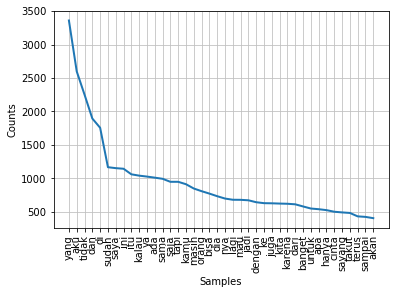

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
fdist.plot(40,cumulative=False)